# Gráfico de Barras Apiladas
Es un gráfico de barras en donde apilamos las barras de distintas categorías en una misma categoría codificada en el Eje X. Tiene la misma utilidad del gráfico de barras pero podemos visualizar cambios de magnitud de diversas categorías al mismo tiempo.   
**Eje X**: Variable categórica   
**Eje Y**: Variable numérica   
**Otros nombres**: Grafico de Columnas Apiladas, Stacked Bar Chart

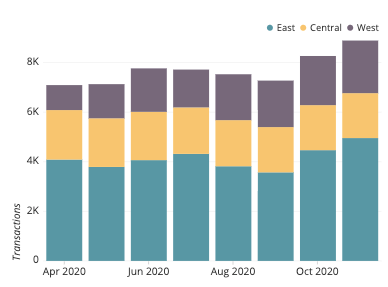

### Cuando Utilizar
- Quiero analizar los cambios de magnitud de diversas categorías al mismo tiempo a lo largo de otra variable categórica. 
- Me interesa ver al mismo tiempo los cambios de la sumatoria total de la variable numérica de entre todas las categorías. 

### Consejos
- No apilar demasiadas categorías ya que el gráfico se vuelve de dificil interpretación.
- Es recomendable utilizar un color diferente para diferenciar cada categoría de las barras apiladas.
- En todas las barras guarda el mismo orden de apilado.
- *Luego tenemos los mismos consejos que en un gráfico de barras común...*
- Empieza el eje Y en el valor del "cero". Asi no vas a "disfrazar" cambios de magnitudes irrelevantes **(Ver primera imágen de abajo)**
- Si las variables categoricas del Eje X guardan un orden (Ejemplo: años, meses, horas), se recomienda ordenar las columnas. Del mismo modo si quieres enfatizar que es un "Top" (en cuyo caso las barras se ordenarian segun el valor en el Eje Y). 
- No hacer las barras "tridimensionales" o con formas extrañas que puedan cofundir al lector acerca del valor en el eje Y **(Ver segunda imágen de abajo)**
- Barras verticales o horizontales? No hay preferencia. Puede depender de cuantas categorías quiero mostrar o del tamaño de mis etiquetas categóricas
- Si en ves de apilar las barras, las coloco a un costado una después de la otra se convierte en un Gráfico de Barras Múltiples (ver imágen)

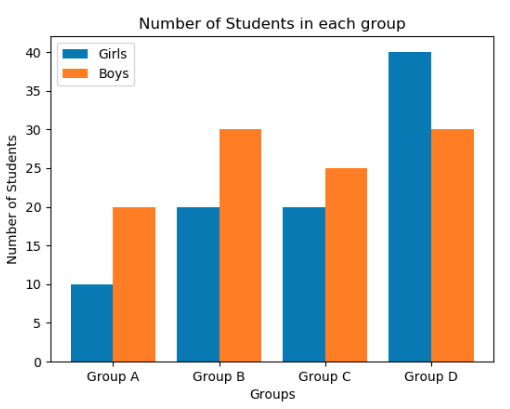

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Preprocesamiento de datos
raw = pd.read_csv('../data/tienda_ventas.csv')
raw['fecha'] = raw['date'].apply(lambda x: x[:7])
raw['anio'] = raw['date'].apply(lambda x: x[:4])
df_2015 = raw[(raw['anio'] == '2015') & (raw['family'].isin(['SEAFOOD', 'MEATS', 'DAIRY']))]
agrupacion = df_2015[['fecha', 'family', 'sales']].groupby(['fecha', 'family']).sum()
df2 = agrupacion.reset_index(1) # Para seaborn y plotly
df = agrupacion.unstack() # Para pandas
df.columns = df.columns.droplevel() 
df

family,DAIRY,MEATS,SEAFOOD
fecha,,,
2015-01,1134521.0,543117.728891,40465.835012
2015-02,1020747.0,498735.076839,36066.561003
2015-03,1234851.0,546517.159221,43808.473074
2015-04,1181180.0,522304.280744,39983.471003
2015-05,1293308.0,591691.899734,42506.832015
2015-06,1243588.0,565014.130035,38780.552004
2015-07,1244815.0,594903.677368,38535.588006
2015-08,1263428.0,581214.143026,37767.580998
2015-09,1224619.0,562711.633157,41906.374010


# Pandas

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


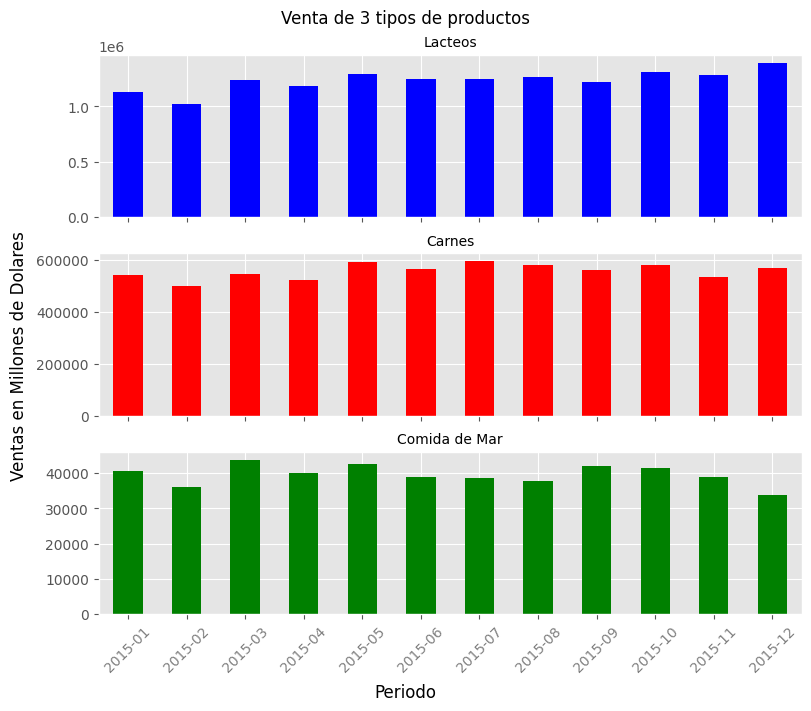

In [3]:
plt.style.use('ggplot')

fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, constrained_layout=True)

fig.set_size_inches(8, 7)
fig.suptitle('Venta de 3 tipos de productos')
fig.supylabel('Ventas en Millones de Dolares')
fig.supxlabel('Periodo') 

df.plot.bar(y='DAIRY', ax=ax1, color='blue')
df.plot.bar(y='MEATS',ax=ax2,color='red')
df.plot.bar(y='SEAFOOD',ax=ax3, color='green')

title_font = {
    'size': 10,
    'name': 'Helvetica'
}

ax1.set_title('Lacteos', fontdict=title_font)
ax2.set_title('Carnes', fontdict=title_font)
ax3.set_title('Comida de Mar', fontdict=title_font)

ax1.set_xticklabels([])
ax2.set_xticklabels([])

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')

ax3.set_xticks(np.arange(0, len(df))) 
ax3.set_xticklabels(df.index.values, rotation=45, fontdict={'color':  'grey', 'size': 10})

ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)

# Guardado de Figura - Es importante hacerlo antes de plt.show()
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig('nivel_1.5_matplotlib.png', format='png')

plt.show()


# Seaborn

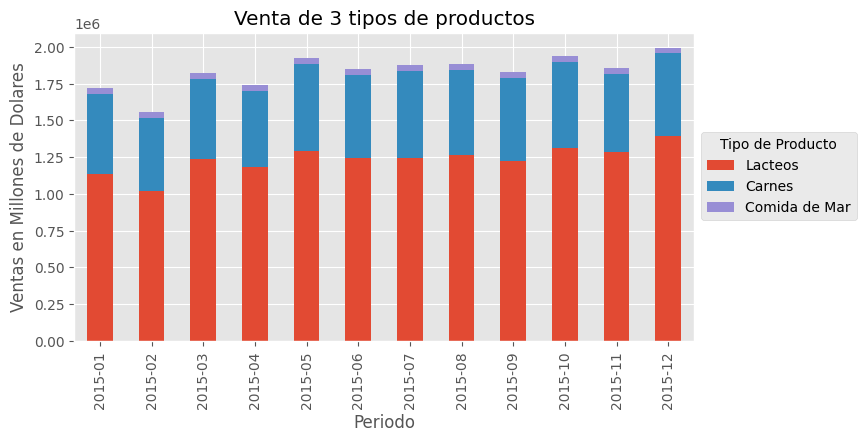

In [4]:
fig, ax = plt.subplots() # Si no pasamos ningun argumento, nos devuelve automaticamente un solo ax

fig.set_size_inches(8, 4)

df.plot.bar(
    ax=ax,
    stacked=True # Con False, nos hace un gráfico de barras multiples
)

ax.set_title('Venta de 3 tipos de productos')
ax.set_ylabel('Ventas en Millones de Dolares')
ax.set_xlabel('Periodo') 

ax.legend(
    title='Tipo de Producto',
    labels=['Lacteos', 'Carnes', 'Comida de Mar'], 
    loc='upper left', 
    bbox_to_anchor=(1, 0.7)
)
